In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
caddy = pd.read_csv("caddy-benchmark-results.csv", sep="\s*,\s*")
caddy.head()

,benchmark_timestamp,hostname,filesize_kb,workers,req_per_s
0,2021-01-31T15:50:23.693890Z,t630-1,1,1,701.8367
1,2021-01-31T15:50:23.693890Z,atomicpi02,1,1,704.7759
2,2021-01-31T15:50:23.693890Z,pi4-8748bce1,1,1,1097.3161
3,2021-01-31T15:50:23.693890Z,t630-1,2,1,758.4949
4,2021-01-31T15:50:23.693890Z,atomicpi02,2,1,696.9622


In [3]:
caddy["theoretical_rate"] = 1e9 / 8 / caddy["filesize_kb"] / 1000
caddy["rel_rate"] = caddy.req_per_s / caddy["theoretical_rate"]
caddy.head()

,benchmark_timestamp,hostname,filesize_kb,workers,req_per_s,theoretical_rate,rel_rate
0,2021-01-31T15:50:23.693890Z,t630-1,1,1,701.8367,125000.0,0.005615
1,2021-01-31T15:50:23.693890Z,atomicpi02,1,1,704.7759,125000.0,0.005638
2,2021-01-31T15:50:23.693890Z,pi4-8748bce1,1,1,1097.3161,125000.0,0.008779
3,2021-01-31T15:50:23.693890Z,t630-1,2,1,758.4949,62500.0,0.012136
4,2021-01-31T15:50:23.693890Z,atomicpi02,2,1,696.9622,62500.0,0.011151


The machines in this test:
* atomicpi02: Atomic Pi, with 2 GB RAM, Intel Atom quad-core CPU, eMMC storage
* lab01: Generic desktop PC, with 8 GB RAM, Intel i7-870 CPU, SATA SSD
* pi4-8748bce1: Raspberry Pi 4 Model B, with 2 GB RAM, Broadcom quad-core ARM CPU, running aarch64
* t630-1: HP T630 thin client, with 16 GB RAM, AMD GX-420GI CPU

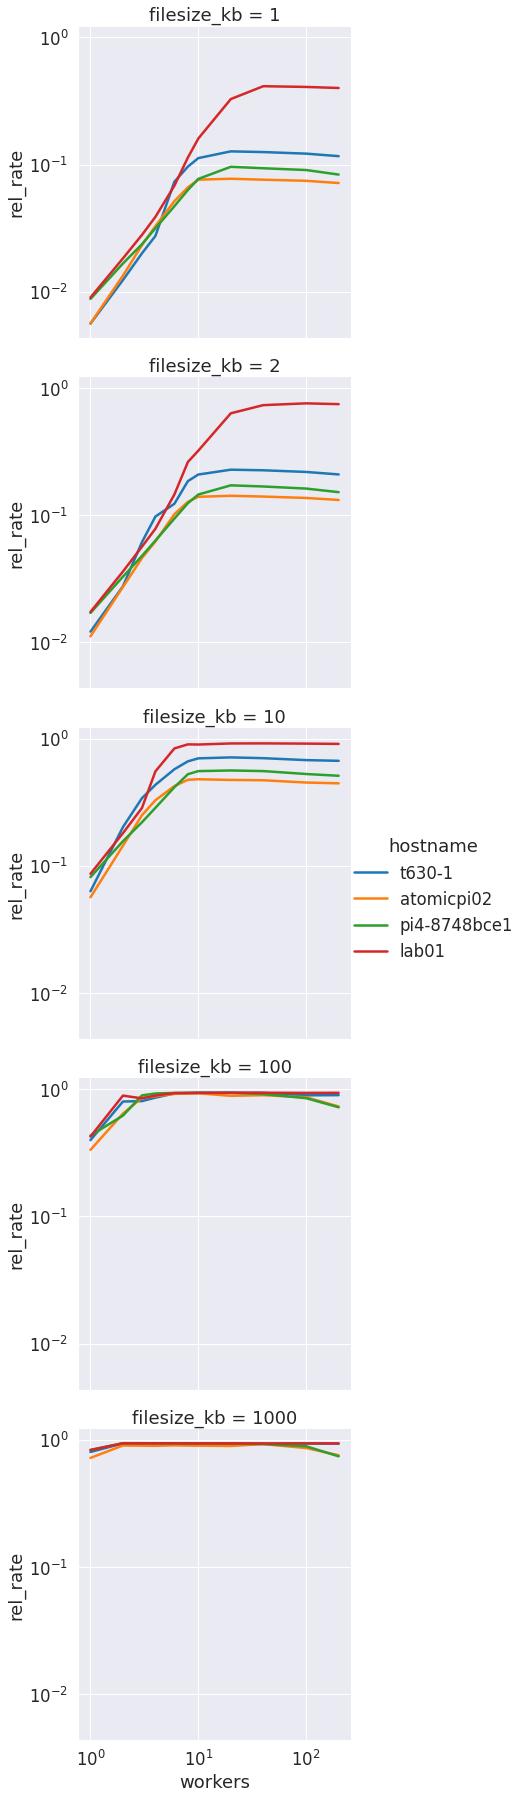

In [4]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
g = sns.relplot(data=caddy, x="workers", y="rel_rate", row="filesize_kb", hue="hostname", kind="line")
g.set(xscale="log", yscale="log")